.

# Project: Investigate a Dataset - NoShowAppointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

><ul>
><li>This dataset have 14 features.</li>
><li>Most of them are selfdescribing.</li>
><li>Handcap(Not binary) represent the number of disabilites the patient have. -<a href="Kaggle"> https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699#229356 </a>- </li>
><li>SMS(binary) indicates if patient recevied SMS as a reminder.</li>
></ul>


### Questions for Analysis:

At first we think about our target and try to assume how feature affect the target.

><ul>
><li>People may forget their appointments, so first question, Does the SMS number affect the target?</li>
><li>Many things can happen in a span of a month or week, so, Does the difference between reservation date and actual date affect the target?</li>
><li>Does the type of disease affect the target?</li>
></ul>



In [1]:
#First let's import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




### General Properties
> First, Let's load and explore the summary statistics for the data.

In [2]:
# Loading the data and printing out a few lines. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# inseocting datatypes and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# checking for duplicates
df.duplicated().sum()

0

It seems like we don't have any nulls, and ScheduledDay and AppointmentDay needs to be converted to datetime.

In [5]:
# Summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From statistics, it seems like most of the data is clean expect the **age** column, as the **min is -1** and **max is 115!** Also the id column is float so we have to change it.

### Investigating Age:

> After searching about age in the world, it seems that 115 is not that strange. https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people


In [6]:
# counting people with age > 100
df[df.Age > 100]['Age'].count()

7

In [7]:
# counting people with age < 0 
df[df.Age < 0]['Age'].count()

1

In [8]:
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
df[df.Age == 0]['Age'].count()

3539

Age == 0, I'll asume they're babies with months old.

### Investigating Age and Alcoholism:

> I want to make sure that ages under 15 have no alcoholism.

In [10]:
df_age = df[df.Age < 16]
df_age[df_age['Alcoholism'] == 1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6402,4.991143e+11,5683456,M,2016-05-11T07:32:26Z,2016-05-13T00:00:00Z,11,PARQUE MOSCOSO,1,0,0,1,0,0,No
17463,3.668727e+12,5693519,M,2016-05-13T07:21:38Z,2016-05-17T00:00:00Z,7,REDENÇÃO,0,0,0,1,0,0,No
17905,5.717682e+13,5647970,M,2016-05-02T14:47:48Z,2016-05-11T00:00:00Z,13,SANTA MARTHA,0,0,0,1,0,1,No
31206,5.282758e+11,5745716,M,2016-05-30T12:33:18Z,2016-05-30T00:00:00Z,15,PIEDADE,1,0,0,1,0,0,No
32817,2.651852e+12,5623088,M,2016-04-26T13:32:34Z,2016-05-12T00:00:00Z,5,RESISTÊNCIA,0,0,0,1,0,1,Yes
53536,3.484979e+13,5726323,M,2016-05-20T13:30:05Z,2016-05-20T00:00:00Z,12,SANTOS REIS,0,0,0,1,0,0,Yes
53549,3.484979e+13,5694436,M,2016-05-13T08:38:50Z,2016-05-13T00:00:00Z,12,SANTOS REIS,0,0,0,1,0,0,Yes
53587,3.484979e+13,5669570,M,2016-05-06T11:08:48Z,2016-05-06T00:00:00Z,12,SANTOS REIS,0,0,0,1,0,0,Yes
53733,3.484979e+13,5726706,M,2016-05-20T14:10:56Z,2016-05-20T00:00:00Z,12,SANTOS REIS,0,0,0,1,0,0,Yes
53746,3.484979e+13,5694587,M,2016-05-13T08:47:34Z,2016-05-13T00:00:00Z,12,SANTOS REIS,0,0,0,1,0,0,Yes


it seems like we have some strange underage with Alcoholism. made a thread about this but got no answer till now, so I'll keep them as special cases (Maybe resulting from abuse for now) disscusion: https://www.kaggle.com/joniarroba/noshowappointments/discussion/277514 

In [11]:
# Value counts for every column
columns = df.drop(columns=['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Age','Neighbourhood']).columns

for col in columns:
    print("\nValue counts:\n", df[col].value_counts())


Value counts:
 F    71840
M    38687
Name: Gender, dtype: int64

Value counts:
 0    99666
1    10861
Name: Scholarship, dtype: int64

Value counts:
 0    88726
1    21801
Name: Hipertension, dtype: int64

Value counts:
 0    102584
1      7943
Name: Diabetes, dtype: int64

Value counts:
 0    107167
1      3360
Name: Alcoholism, dtype: int64

Value counts:
 0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

Value counts:
 0    75045
1    35482
Name: SMS_received, dtype: int64

Value counts:
 No     88208
Yes    22319
Name: No-show, dtype: int64


### Summary & what to clean or do:

The data have some quality issues.
><ul>
><li>Convert ScheduledDay and AppointmentDay to datetime. </li>
><li>Change PatientId to float.</li>
><li>Change Age= -1 to 0.</li>
><li>Change columns names (some typo errors) Handcap>Handicap</li>
></ul>


### Data Cleaning
> First, let's convert the datatypes to the correct data types.
 

In [12]:
# making a copy of data
df_clean=df.copy()

In [13]:
# Converting to the right type of data type
df_clean['ScheduledDay'] = pd.to_datetime(df_clean['ScheduledDay'])
df_clean['AppointmentDay'] = pd.to_datetime(df_clean['AppointmentDay'])

# Converting PateintId to int
#df_clean['PatientId'] = df_clean['PatientId'].astype(int)

**Note:** Decided not to change the PatientId to int as it will result in too many dublications and id must be unique.

In [14]:
#Making sure that everything is set right
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [15]:
len(df_clean['PatientId'].unique())

62299

**It seems that id wasn't unique from the start! didn't notice that.**

### Changing the type erros:

In [16]:
df_clean=df_clean.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap'})
df_clean.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

Replacing age = -1  with 0:

In [17]:
df_clean['Age'] = df_clean['Age'].replace({-1: 0})

In [18]:
df_clean[df_clean.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show


In [19]:
df_clean.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No


In [20]:
# getting the wait time to analysis in one of the questions.
# copied from kaggle
df_clean['Waiting_days'] = df_clean['AppointmentDay'] - df_clean['ScheduledDay']
df_clean['Waiting_days'] = df_clean['Waiting_days'].dt.days

<a id='eda'></a>
## Exploratory Data Analysis

> ### Research Question 1:
Does the SMS number affect the target?








In [21]:
# Function to help in drawing
def count_plot(x,data,hue,plot_title,row=None):
    g = sns.catplot(x=x,data=data,kind="count",hue=hue,row=row)
    g.ax.set_title(plot_title)

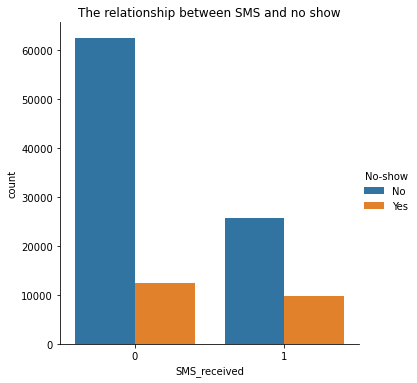

In [22]:
#sns.catplot(x="SMS_received",data=df_clean,kind="count",hue="No-show")
count_plot("SMS_received",df_clean,"No-show","The relationship between SMS and no show")

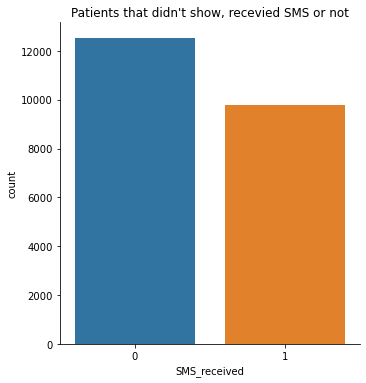

In [23]:
# sms recevied percentage
#sns.catplot(x="SMS_received",data=df_clean[df_clean['No-show']=='Yes'],kind="count")
count_plot("SMS_received",df_clean[df_clean['No-show']=='Yes'],None,"Patients that didn't show, recevied SMS or not")

> ### Summary:
It seems that patients that didn't show most of them didn't receive SMS. as a start SMS seems important but needs more investigiation.

In [24]:
print(df_clean.groupby(['SMS_received','No-show'])['Age'].count())
df_clean.groupby(['SMS_received','No-show'])['Age'].mean()

SMS_received  No-show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: Age, dtype: int64


SMS_received  No-show
0             No         37.338170
              Yes        34.642920
1             No         38.889330
              Yes        33.900961
Name: Age, dtype: float64

> ### Summary:
it seems that ages of no show = yes is less than no-show = no, so will investigate the age.

> ### Research Question 2:
Does the age of the patient affect the target? 
note: it's on time question and wasn'y mentioned above.

C:\Users\trast\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


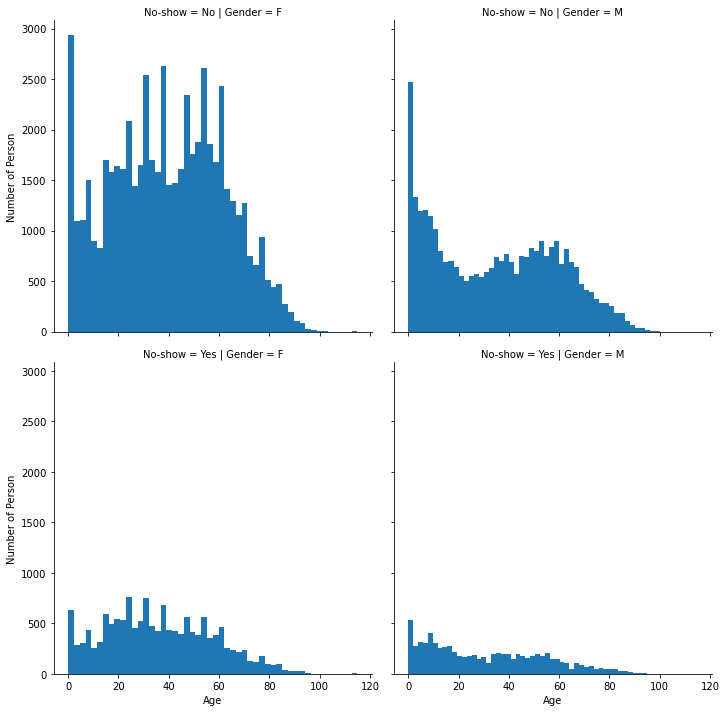

<Figure size 720x576 with 0 Axes>

In [25]:
g = sns.FacetGrid(df_clean, col="Gender",row='No-show',size=5, aspect=1)
g.map(plt.hist, 'Age', bins=50)
#sns.set(font_scale=1.5);
plt.figure(figsize=(10,8))
g.set_axis_labels("Age", "Number of Person");


> ### Summary:
In Fig3 we can see that females between -~ 25 to 35 didn't show up the most.
And babies or children show up the most because their parents take them to the hosipital.

> ### Research Question 3:
Does the type of disease affect the target? and the relationship between it and Scholarship?

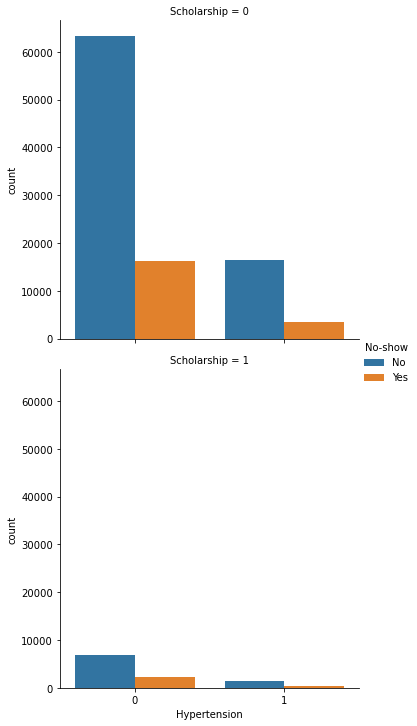

In [26]:
sns.catplot(x="Hypertension",data=df_clean,kind="count",hue="No-show",row='Scholarship')

Does a scholarship affect the target anyway?

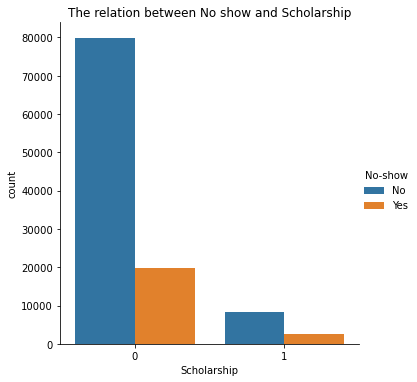

In [27]:
count_plot(x='Scholarship',data=df_clean,hue='No-show',plot_title="The relation between No show and Scholarship")

In [28]:
def percentage(data,groupby,title,x_ticks):
    ratio = data.groupby([groupby]).size()/df_clean.groupby([groupby]).size()
    ax = sns.barplot(x=ratio.index, y=ratio)
    ax.set_title(title)
    x_ticks_labels =x_ticks
    ax.set_xticklabels(x_ticks_labels)
    plt.show()

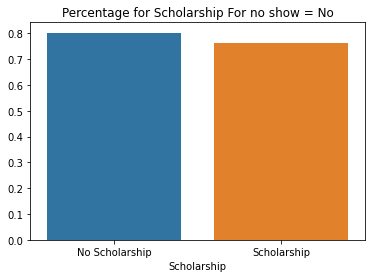

In [29]:
percentage(df_clean[df_clean['No-show'] == 'No'],'Scholarship',"Percentage for Scholarship For no show = No",
           ['No Scholarship', 'Scholarship'])

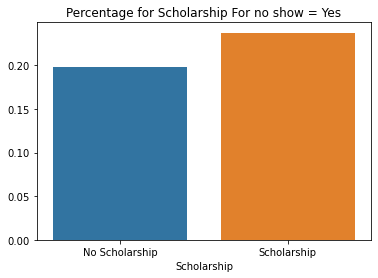

In [30]:
percentage(df_clean[df_clean['No-show'] == 'Yes'],'Scholarship',"Percentage for Scholarship For no show = Yes",
           ['No Scholarship', 'Scholarship'])

> ### Summary:
it seems that People with scholarship though they're not a lot, most of them show up to appoinments, only small percentage didn't show.

Handicap  No-show
0         No         86374
          Yes        21912
1         No          1676
          Yes          366
2         No           146
          Yes           37
3         No            10
          Yes            3
4         No             2
          Yes            1
Name: No-show, dtype: int64


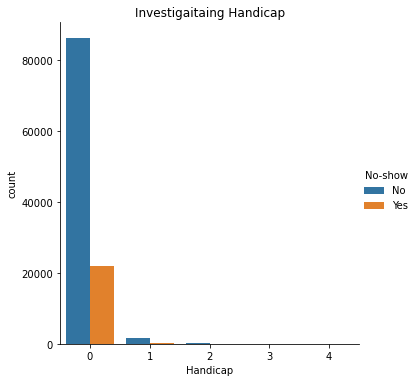

In [31]:
print(df_clean.groupby(['Handicap','No-show'])['No-show'].count())
count_plot(x="Handicap",data=df_clean,hue='No-show',plot_title="Investigaitaing Handicap")

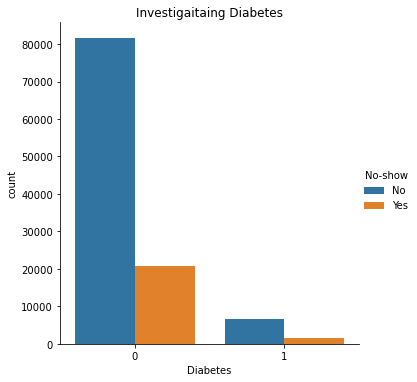

In [32]:
count_plot(x="Diabetes",data=df_clean,hue='No-show',plot_title="Investigaitaing Diabetes")

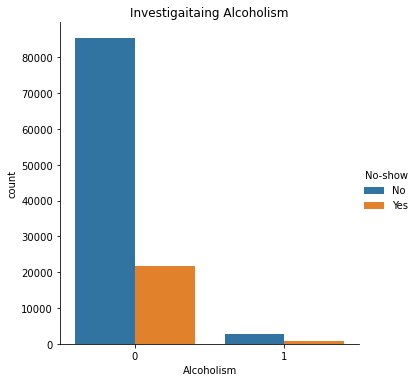

In [33]:
count_plot(x="Alcoholism",data=df_clean,hue='No-show',plot_title="Investigaitaing Alcoholism")

> ### Summary:
The disease effect is not that clear, it seems that if someone have diabetes they will likely show to the appoinetment, but it needs more proofs.

> ### Research Question 4:
Does the difference between reservation date and actual date affect the target?

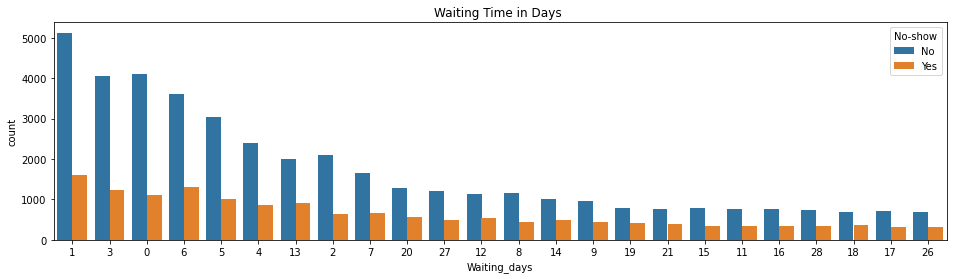

In [34]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df_clean.Waiting_days, hue=df_clean['No-show'],order=df_clean.Waiting_days.value_counts().iloc[1:25].index)
ax.set_title("Waiting Time in Days ")
plt.show()

> ### Summary:
The less the day the higher the chance that the pateient will come.

Finally,

<a id='conclusions'></a>
## Conclusions:

><ul>
><li>The number of waiting days affect the no_show, the less the day the higher the chance that the pateient will come.</li>
><li>Receving a message makes a higher chance that the patient will come to the appointement.</li>
><li>People with Hypertension is the least likely to come and people with diabetes is the most likely to come.</li>
><li>Scholarship may or may not affect the no show, needs more information.</li>
></ul>


### Limitations:

><ul>
><li>Varibles are not very clear and the dataset creator itself is inconsistent in some things. ex: Handicap and SMS.</li>
><li>Categorical data limitations. Needs more of them and in another arrange.</li>
></ul>




In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1